$$
\begin{array}{c}
\textbf{CAUSAL INFERENCE - Fall 2025}\\\\
\textit{Center for Data Science, New York University} \\\\
\textit{October 03, 2025}\\\\\
\text{ Prepared by: Vivek Kumar Agarwal, Ref: Lecture notes Xiang Gao}\\\\
\textbf{Recitation 5: Experiments }\\\\
\end{array}
$$

# Experiments 

![Causal Inference](../figures/CI_lab5_image1.jpg)

## Today's Recitation 

### Quick Review
- Degrees of Freedom - Discussion in Lab 4

### Continuing Ahead with
- Experiments 
- Lets Code!!

---

# Degrees of Freedom in Statistics

## Introduction

Degrees of freedom (df) is a fundamental concept in statistics that appears in many contexts: hypothesis testing, confidence intervals, regression analysis, and more. It helps make accurate statistical inferences.

## Core Definition

**Degrees of Freedom** = The number of values that are free to vary after we've imposed certain constraints or estimated parameters from the data.

Mathematically:
```
df = n - k
```
where:
- n = number of observations
- k = number of constraints or parameters estimated

---

## A little Intuiition !!!

### The Restaurant Menu Analogy

Imagine you're ordering food for 3 friends with a $30 budget:
- Friend 1 orders a $12 meal ✓ (free choice)
- Friend 2 orders an $8 meal ✓ (free choice)
- Friend 3 must order a $10 meal ✗ (constrained by budget)

Even though there are 3 people, only 2 have "freedom" to choose. The third choice is determined by the constraint (budget = $30).

### The Simple Numbers Example

Suppose you have 3 numbers with a mean of 10.

If the first two numbers are 8 and 12, what must the third number be?

```
(8 + 12 + x₃) / 3 = 10
20 + x₃ = 30
x₃ = 10
```

The third value is **determined** once we know:
1. The first two values
2. The mean (constraint)

Therefore: 3 observations - 1 constraint = **2 degrees of freedom**

## Understanding Constraints

A **constraint** is a condition that the data must satisfy, limiting how freely values can vary.

### Common Statistical Constraints

1. **Fixed Sum**: When values must sum to a specific total
   - Example: Σxᵢ = 50

2. **Deviations Sum to Zero**: When calculating variance
   - Constraint: Σ(xᵢ - x̄) = 0
   - This is always true mathematically

3. **Probabilities Sum to One**: In probability distributions
   - Constraint: Σpᵢ = 1

### Example: Deviations from the Mean

Given data: [2, 4, 6, 8, 10], mean = 6

Deviations: [-4, -2, 0, 2, 4]

Notice that: -4 + (-2) + 0 + 2 + 4 = 0

If you know the first 4 deviations, the 5th is automatically determined to make the sum equal zero.

## Understanding Parameters Estimated

Each time we **estimate a parameter from the data** and then use it in subsequent calculations, we "use up" one degree of freedom.

### Why Does This Happen?

When you estimate a parameter from your sample, you create a dependency between that estimate and your data. This dependency acts as a constraint.

### Example: Sample Variance

The formula for sample variance:

```
s² = Σ(xᵢ - x̄)² / (n - 1)
```

Why (n - 1) and not n?

1. We start with n independent observations
2. We calculate x̄ (sample mean) from these same observations
3. We've now estimated 1 parameter, creating the constraint Σ(xᵢ - x̄) = 0
4. Only (n - 1) deviations can vary freely
5. Therefore: df = n - 1

### The Key Insight

**Estimating a parameter = Creating a constraint**

When we estimate the mean from our data, we force the deviations to sum to zero. This is a constraint we've imposed by using the data twice (once to estimate, once to calculate variance).

## The General Formula

For most statistical procedures:

```
Degrees of Freedom = Number of observations - Number of parameters estimated
```

Or equivalently:

```
Degrees of Freedom = Number of independent pieces of information
```

## Common Applications

### 1. One-Sample t-Test

Testing if a sample mean differs from a hypothesized value.

```
df = n - 1
```

We estimate 1 parameter (μ, the population mean) from the sample.

### 2. Two-Sample t-Test

Comparing means of two independent groups.

```
df = n₁ + n₂ - 2
```

We estimate 2 parameters (μ₁ and μ₂, the two group means).


The frequencies must sum to n (constraint), so only (k - 1) are free to vary.


### 3. Simple Linear Regression

Fitting a line: y = β₀ + β₁x

```
df = n - 2
```

We estimate 2 parameters (β₀ and β₁, the intercept and slope).

### 6. Multiple Linear Regression

With p predictor variables:

```
df = n - (p + 1)
```

We estimate (p + 1) parameters: p slopes plus 1 intercept.


## Why Do Degrees of Freedom Matter?

### 1. Correct Standard Errors

Using the wrong df leads to incorrect standard errors and invalid inference.

### 2. Appropriate Test Statistics

Many test statistics (t, χ², F) follow distributions that depend on degrees of freedom.

### 3. Accurate p-Values

The df determine the shape of the sampling distribution, affecting p-value calculations.

### 4. Better Estimation

Using (n - 1) instead of n makes the sample variance an unbiased estimator of population variance.

---

## An Example to summarize: Sample Variance

Let's calculate variance for the dataset: [4, 8, 6, 10, 2]

**Step 1**: Calculate the mean
```
x̄ = (4 + 8 + 6 + 10 + 2) / 5 = 30 / 5 = 6
```

**Step 2**: Calculate deviations
```
x₁ - x̄ = 4 - 6 = -2
x₂ - x̄ = 8 - 6 = 2
x₃ - x̄ = 6 - 6 = 0
x₄ - x̄ = 10 - 6 = 4
x₅ - x̄ = 2 - 6 = -4
```

**Step 3**: Verify constraint
```
Sum of deviations = -2 + 2 + 0 + 4 + (-4) = 0 ✓
```

**Step 4**: Calculate sum of squared deviations
```
Σ(xᵢ - x̄)² = (-2)² + (2)² + (0)² + (4)² + (-4)²
            = 4 + 4 + 0 + 16 + 16
            = 40
```

**Step 5**: Calculate variance with df = n - 1
```
s² = 40 / (5 - 1) = 40 / 4 = 10
```

If we had incorrectly used n instead of (n - 1):
```
Incorrect: 40 / 5 = 8 (biased estimator)
```

## Key takeaways

1. **Degrees of Freedom** = Number of independent pieces of information
   - df = n - k
   - n = number of observations
   - k = number of constraints or parameters estimated

2. **Using n when you should use (n - 1)**
   - Leads to underestimating variance
   - Creates biased estimators


---

## Lets Continue with Experiments..

- **The measurement of our ATE**: estimating causal quantities from sample data.
- **Interpreting our ATE**: How do we map from the quantities that we estimate to the quantities we care about? How do we assess confidence in the estimated causal quantities.
- Implications of relaxing the SUTVA and perfect compliance assumptions.
- Potential pitfalls of RCTs.

The fundamental principle of randomization is straightforward:

> When units are randomly assigned to a treatment, the only distinction between those receiving the treatment and those who do not is the treatment itself. Consequently, any observed differences between the two groups can be attributed solely to the treatment.

Our objective is to estimate the **Average Treatment Effect (ATE)**, which measures the difference in outcomes between individuals who received a treatment and those who did not.

To do this, we rely on two key assumptions: **perfect compliance** and **SUTVA**, which allows us to assert that the treatment, $S$, is **independent** of other factors, $U$, that could influence the outcome $Y$, leading to:

$$
ATE = \mathbb{E}[Y(S=1, U) \mid S=1] - \mathbb{E}[Y(S=0, U) \mid S=0].
$$

Let's apply these concepts to estimate the ATE on a case study:

> the impact of a job training program ($S$), National Supported Work (NSW) Demonstration, on wages ($Y$).

Participants were _randomly assigned_ to receive job training or not, which helped ensured independence from confounding factors.




---

## Brief on the LaLonde (1986) Study

**The Study:**
- LaLonde (1986) "Evaluating the Econometric Evaluations of Training Programs with Experimental Data," American Economic Review 

**The Program:**
- National Supported Work (NSW) Demonstration (1975-1979): subsidized work program for ex-offenders, former drug addicts, long-term welfare recipients, and school dropouts 

**The Design:**
- Randomly assigned applicants to job training program or control group 
- Sample: 185 treated, varying control group sizes; measured earnings in 1974, 1975, and 1978 (outcome) 

**The Innovation:**
- Combined experimental data with observational data (PSID) to test if observational methods could replicate experimental results 
- Shocking finding: most observational methods failed badly, giving wrong estimates

**Why It Matters:**
- Demonstrated challenges of causal inference without randomization
- Became canonical dataset for causal inference, inspiring multiple follow-up studies -- Heckman and Hotz (1989), Dehejia and Wahba (1999), Smith and Todd (2005), and Firpo (2007) 
- Helps understand RCTs and comparing methods

## Our goal today 

+ Replicate the estimation conducted by LaLonde, who utilized data from the randomized evaluation to assess the program's effectiveness. For more detailed information about the study and data, refer resource: [LaLonde's Study](https://search.r-project.org/CRAN/refmans/designmatch/html/lalonde.html).


---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from matplotlib.patches import FancyArrowPatch
from tabulate import tabulate
from scipy import stats
from statsmodels.formula.api import ols

In [2]:
url_base = '../data/nsw.dta'
data = pd.read_stata(url_base)




### Causal Model for the Impact of the Job Training Program on Wages

Some key components of this causal model are:

- **Treatment Indicator ($S$)**: A binary variable, denoted as $\text{treat}$, which indicates whether an individual received job training (1) or not (0).

- **Outcome ($Y$)**: The primary outcome of interest, represented as $\text{re78}$, to indicate the annual wages of participants measured in the year 1978.

- **Confounding Variables ($U$)**: Other factors that may affect wages include age, education, race, marital status, and degree.


In [3]:
data.describe()

,treat,age,education,black,hispanic,married,nodegree,re75,re78
count,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,0.411357,24.520776,10.267313,0.800554,0.105263,0.162050,0.779778,3042.896484,5454.635742
std,0.492421,6.625947,1.704774,0.399861,0.307105,0.368752,0.414683,5066.143555,6252.943359
min,0.000000,17.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,23.000000,10.000000,1.000000,0.000000,0.000000,1.000000,936.307953,3951.889038
75%,1.000000,27.000000,11.000000,1.000000,0.000000,0.000000,1.000000,3993.206970,8772.004395
max,1.000000,55.000000,16.000000,1.000000,1.000000,1.000000,1.000000,37431.660156,60307.929688


#### According to our data, the study included 722 participants, with 425 receiving the job training program.

In [4]:
data['treat'].value_counts()

0    425
1    297
Name: treat, dtype: int64

### 2.2) $\hat{ATE}$?

To estimate the ATE from data, we calculate the **conditional sample means**:

$$
\hat{ATE} = \mathbb{\hat{E}}[Y(1, \hat{U}) \mid S = 1] - \mathbb{\hat{E}}[Y(0, \hat{U}) \mid S = 0].
$$

Since these sample means are **consistent** and **unbiased**, our estimate of the ATE is robust and reliable.

Therefore, to estimate the ATE of the job training program ($S$) on wages ($Y$), we would simply:

In [5]:
# Conditional samples means for treated and control groups
mean_treated = data[data['treat']==1]['re78'].mean()
mean_control = data[data['treat']==0]['re78'].mean()
# ATE as the difference in conditional means
ate = mean_treated - mean_control
print(f"Estimated ATE (Difference in Means): {ate:.2f}")

Estimated ATE (Difference in Means): 886.30


This implies, that, on average, individuals who received the job training program earned $886.30$ than those who did not receive the training. **How confident are we on these results?**

### 2.3) How confidente are we on our $\hat{ATE}$?


This is only an estimate of the ATE, and we cannot be certain it reflects the true value. Fortunately, the Central Limit Theorem (CLT) allows us to approximate the distribution of errors in the estimated conditional sample means.

#### Hypothesis Testing for the ATE

To determine whether the work program has a positive impact on wages, our hypothesis is as follows:

- **Null Hypothesis ($H_0$)**:
$$\mathbb{E}[Y(S = 1, U)] = \mathbb{E}[Y(S = 0, U)] \implies \text{ATE}=0.$$


- **Alternative Hypothesis ($H_1$)**: $$  \mathbb{E}[Y(S = 1, U)] >  \mathbb{E}[Y(S = 0, U)] \implies \text{ATE}>0.$$


Notice that we’re doing a one-sided test!

In [6]:
income_treate = data[data['treat']==1].re78
income_contro = data[data['treat']==0].re78

stats.ttest_ind(
    income_treate,
    income_contro,
    alternative='greater',
    equal_var=False
    )

Ttest_indResult(statistic=1.815435269680496, pvalue=0.03499729558570174)

Since the p-value is approximately 0.035, which is less than the common significance level of 0.05, we reject the null hypothesis. This implies that there is statistically significant evidence to support the claim that the mean income of the treated group is greater than that of the control group.

### 2.4) Testing our Assumptions

So far we have relied on a crucial assumption: $$S \perp\!\!\!\perp U.$$

This assumption is supported by:

**a) perfect compliance**, our assumption that all participants adhere to their assigned treatments, and

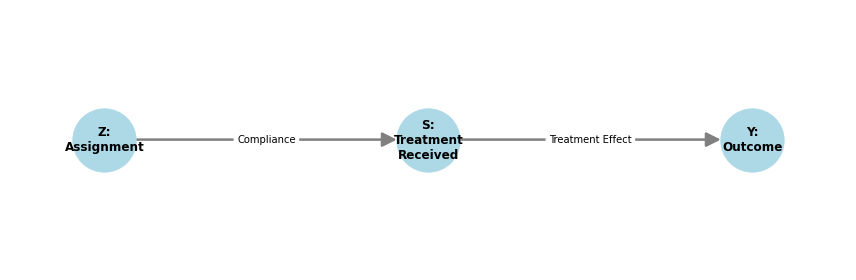

In [7]:
def draw_causal_diagram():
    # Create directed graph
    G = nx.DiGraph()
    
    # Add edges (this automatically creates nodes)
    G.add_edge("Z", "S")
    G.add_edge("S", "Y")
    
    # Layout: left to right
    pos = {"Z": (0, 0.5), "S": (1, 0.5), "Y": (2, 0.5)}
    
    # Create figure
    plt.figure(figsize=(12, 4))
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue',
                          node_size=4000, node_shape='o')
    
    # Draw edges with VISIBLE arrowheads
    nx.draw_networkx_edges(G, pos, edge_color='gray',
                          arrows=True, 
                          arrowsize=30,
                          arrowstyle='-|>',  # Changed for better visibility
                          width=2.5,  # Slightly thicker
                          connectionstyle='arc3,rad=0',
                          node_size=4000,  # Added to create margin
                          min_source_margin=15,  # Space from source node
                          min_target_margin=15)  # Space to target node
    
    # Node labels
    labels = {
        "Z": "Z:\nAssignment",
        "S": "S:\nTreatment\nReceived",
        "Y": "Y:\nOutcome"
    }
    nx.draw_networkx_labels(G, pos, labels, font_size=12, font_weight='bold')
    
    # Edge labels
    edge_labels = {
        ("Z", "S"): "Compliance",
        ("S", "Y"): "Treatment Effect"
    }
    nx.draw_networkx_edge_labels(G, pos, edge_labels,
                                 font_size=10, label_pos=0.5)
    
    plt.axis('off')
    plt.xlim(-0.3, 2.3)  # Added for better spacing
    plt.ylim(0, 1)  # Added for better spacing
    plt.tight_layout()
    plt.show()

# Call the function
draw_causal_diagram()


**b) stable unit treatment value assumption (SUTVA)**, which ensures that potential outcomes for each participant are unaffected by the treatment assignments of others.

Together, these principles are essential for obtaining valid and unbiased estimates of the ATE. **Can we test these assumptions?**

**Testing for these assumptions in a RCT is hard!** Some effective methods researchers use to assess these assumptions are:
+ direct monitoring: self-reports or observation.
+ biomarkers or biological test

## $S \perp\!\!\!\perp U$

Independence between $S$ and $U$ implies that the distribution of potential outcomes $Y$ given treatment status is the same across groups:

$$
P(Y \mid S=1, U) = P(Y \mid S=0, U).
$$

A crucial implication of this independence is that the treatment and control groups should exhibit similarity in their characteristics:

$$
P(U \mid S=1) = P(U \mid S=0).
$$

Thus, any observed differences in outcomes can be attributed to the treatment $S$, rather than confounding factors $U $.

To assess this, we can compare the observable characteristics of the treatment and control groups. A first step is to visually examine the observable characteristics of both groups in the experiment.

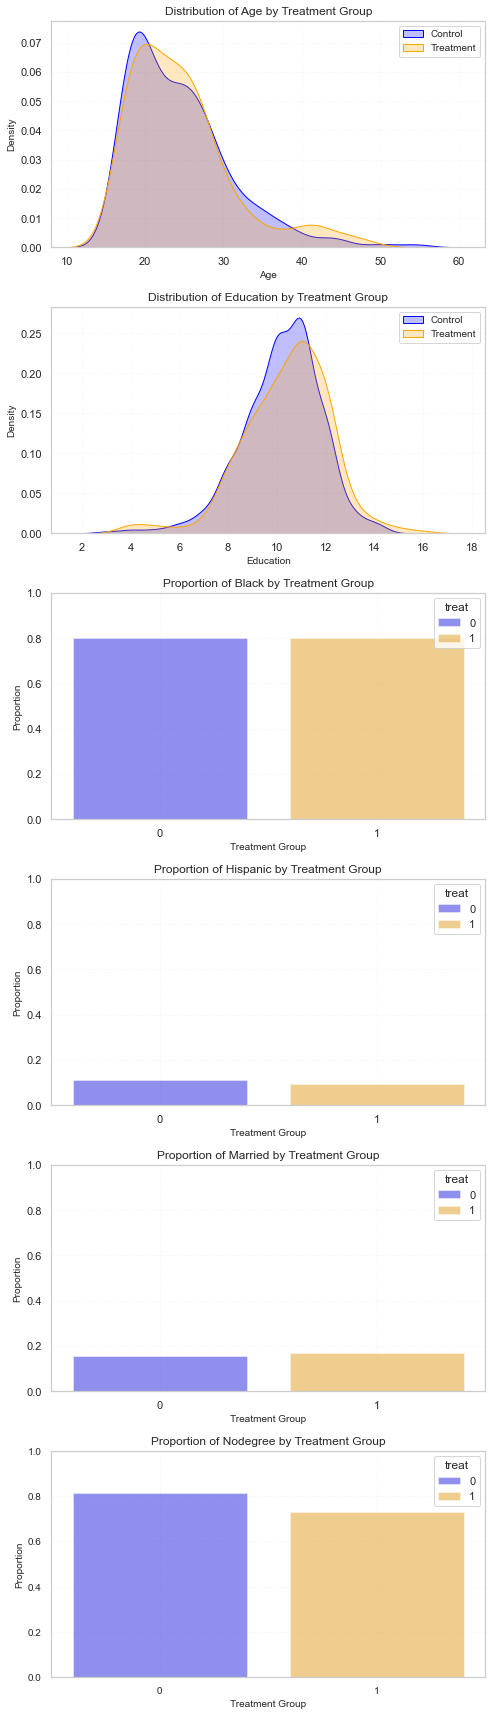

In [8]:
continuous_covariates = ['age', 'education']
dummy_covariates = ['black', 'hispanic', 'married', 'nodegree']
covariates = continuous_covariates + dummy_covariates

sns.set(style='whitegrid', palette='deep')
total_covariates = len(continuous_covariates) + len(dummy_covariates)
fig, axes = plt.subplots(nrows=total_covariates, ncols=1, figsize=(7, total_covariates * 4))

for i, var in enumerate(continuous_covariates):
    sns.kdeplot(data[data['treat'] == 0][var], ax=axes[i], label="Control", fill=True, color='blue')
    sns.kdeplot(data[data['treat'] == 1][var], ax=axes[i], label="Treatment", fill=True, color='orange')
    axes[i].set_title(f'Distribution of {var.capitalize()} by Treatment Group', fontsize=12)
    axes[i].set_xlabel(var.capitalize(), fontsize=10)
    axes[i].set_ylabel('Density', fontsize=10)
    axes[i].legend(fontsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.1)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

for j, var in enumerate(dummy_covariates, start=len(continuous_covariates)):
    proportions = data.groupby('treat')[var].mean().reset_index()
    sns.barplot(
        x='treat',
        y=var, data=proportions, ax=axes[j],
        hue='treat', dodge=False,
        palette=['blue', 'orange'], linewidth=0.8, alpha=0.5
        )
    axes[j].set_title(f'Proportion of {var.capitalize()} by Treatment Group', fontsize=12)
    axes[j].set_xlabel('Treatment Group', fontsize=10)
    axes[j].set_ylabel('Proportion', fontsize=10)
    axes[j].set_ylim(0, 1)
    axes[j].grid(True, linestyle='--', alpha=0.1)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


Inspecting the distributions of key variables (e.g., age, marital status, education level, etc.) reveals that the distributions for both the treatment and control groups have similar shapes, signaling that the groups are well-balanced in terms of observable characteristics.

Next, we can formally test that our groups are indeed "well balanced" by conducting a **balance test**! This test compares the distributions of an observable covariate $X$ between the treatment group $S = 1$ and the control group $S = 0$.

Our balance test is a two-sample t-test to determine whether the difference in means is statistically significant:
$$ H_0: \mathbb{E}(X | S = 1) = \mathbb{E}(X | S = 0), \quad H_a: \mathbb{E}(X | S = 1) \neq \mathbb{E}(X | S = 0)
$$

+ $H_0$ states that there is no difference in the means of the observable covariate between the treatment and control groups.
+ $H_a$ states that there is a difference in means.


We conclude that $S \perp U$ if the means of the observables are not statistically significantly different.

Let's see how this test can be conducted using the Lalonde experiment:

In [9]:
balance_results = []
for var in covariates:
    control_group = data[data['treat'] == 0][var]
    treatment_group = data[data['treat'] == 1][var]
    control_mean, control_std = control_group.mean(), control_group.std()
    treatment_mean, treatment_std = treatment_group.mean(), treatment_group.std()
    t_stat, p_value = stats.ttest_ind(control_group, treatment_group, equal_var=False)
    pooled_std = np.sqrt((control_std ** 2 + treatment_std ** 2) / 2)
    smd = (treatment_mean - control_mean) / pooled_std
    balance_results.append({
        'Variable': var,
        'Control Mean (SD)': f'{control_mean:.2f} ({control_std:.2f})',
        'Treatment Mean (SD)': f'{treatment_mean:.2f} ({treatment_std:.2f})',
        'SMD': smd,
        'P-Value': p_value
    })
balance_table = pd.DataFrame(balance_results)

 Notice we compare the mean values of each covariate between the control and treatment groups using a t-test to evaluate the null hypothesis. If the p-value exceeds the significance level (e.g., $\alpha = 0.05$), we fail to reject the null hypothesis, suggesting that the means are not significantly different.

In [10]:
balance_table

,Variable,Control Mean (SD),Treatment Mean (SD),SMD,P-Value
0,age,24.45 (6.59),24.63 (6.69),0.026995,0.721607
1,education,10.19 (1.62),10.38 (1.82),0.111695,0.144283
2,black,0.80 (0.40),0.80 (0.40),0.003366,0.964504
3,hispanic,0.11 (0.32),0.09 (0.29),-0.061189,0.415479
4,married,0.16 (0.36),0.17 (0.37),0.028938,0.702799
5,nodegree,0.81 (0.39),0.73 (0.44),-0.199791,0.009247


> **How do we interpret this balance table?**

Balance tables help us verify that randomization worked—treatment and control groups should look similar on pre-treatment characteristics. If they don't, it suggests either:
- Randomization failed (implementation problem)
- Bad luck with small samples
- Selection bias crept in somehow

Let's examine the age variable as an example:


#### Consider the first t-test, where $X=age$:
  - An SMD (Standardized Mean Difference) of **0.027** indicates that the difference between groups is very small—only 0.027 standard deviations. 
  - **Rule of thumb:** SMD < 0.1 indicates excellent balance
  - SMD between 0.1-0.2 is acceptable
  - SMD > 0.2 suggests potential imbalance

- The p-value of **0.722** tells us: "If randomization worked perfectly, we'd see differences this large or larger about 72% of the time just by chance."
- Since p > 0.05, we have no evidence that randomization failed for this variable.
- **Important:** We're actually HOPING for high p-values in balance tests (unlike typical hypothesis tests)!

We can further visualize the SMD through a plot:

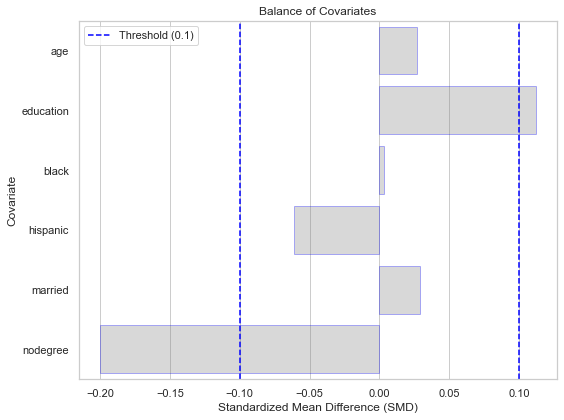

In [11]:
sns.set(style='whitegrid', palette='deep')
smd_df = balance_table[['Variable', 'SMD']].rename(columns={'Variable': 'Covariate'})
plt.figure(figsize=(8, 6))
sns.barplot(x='SMD', y='Covariate', data=smd_df, color='gray', alpha=0.3, edgecolor='blue')
plt.axvline(x=0.1, color='blue', linestyle='--', label='Threshold (0.1)')
plt.axvline(x=-0.1, color='blue', linestyle='--')
plt.xlabel('Standardized Mean Difference (SMD)')
plt.ylabel('Covariate')
plt.title('Balance of Covariates')
plt.legend()
plt.tight_layout()
plt.show()

> **How do we interpret this balance plot?**

The above plot (also called a covariate balance plot) shows the standardized mean difference (SMD) between treatment and control groups for each pre-treatment variable. The vertical dashed lines at ±0.1 represent our threshold for acceptable balance.

**What we're looking for:**
- Confidence intervals (gray boxes) should be **centered near zero**
- Boxes should **stay within the ±0.1 threshold**
- Narrow boxes indicate **precise estimates** (larger sample sizes help)

**For the NSW study:**

**Variables with good balance (SMD < 0.1):**
- **age:** Essentially identical between groups (~0.027 SMD)
- **black:** Well-balanced, confidence interval includes zero
- **married:** Small difference, but acceptable

**Variables with potential imbalance:**
- **education:** SMD extends beyond 0.1 threshold - treatment group may have slightly more education
- **hispanic:** Confidence interval extends below -0.1 - some imbalance
- **nodegree:** Substantial imbalance - control group may have more individuals without degrees

**What does this mean?**

Despite randomization, we see some imbalance on education-related variables. This could happen by chance (especially with modest sample sizes) or suggest:
1. Differential attrition after randomization
2. Implementation issues in the randomization process
3. Just bad luck (with many tests, some imbalance is expected)

**Should we be concerned?**
- The imbalances are moderate, not extreme
- We can control for these variables in our analysis to improve precision
- Randomization validity doesn't require perfect balance, just balance in expectation
- Overall pattern suggests randomization worked reasonably well

**Bottom line:** While not perfect, this balance check shows that treatment and control groups are similar on most characteristics, supporting the validity of our causal estimates.

---

## Relaxing Assumptions: Imperfect Compliance and SUTVA Violations

**What if we relaxed our assumptions of perfect compliance and SUTVA? When and why might these violations occur?**

+ Imperfect compliance can occur due to non-adherence, cross-over, dropouts, or other practical challenges in real-world implementation.

+ SUTVA violations may arise from interference between participants, different versions of the treatment, or external contamination of the control group.

Such violations complicate causal effect estimation, potentially shifting our target parameters or requiring alternative techniques to adjust for these issues.

### Imperfect Compliance
Perfect compliance is rarely observed in real-world scenarios, making it reasonable to assume imperfect compliance. This means that not all individuals adhere to their assigned treatment ($S$), which can introduce bias when estimating the causal effect.

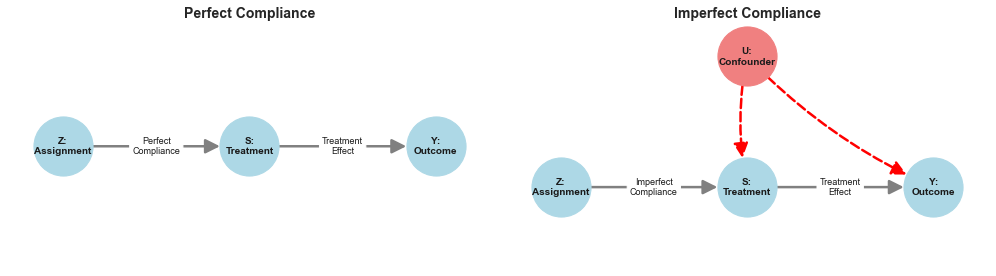

In [12]:


def draw_compliance_diagrams():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
    
    # ===== PERFECT COMPLIANCE =====
    G_perfect = nx.DiGraph()
    G_perfect.add_edge("Z", "S")
    G_perfect.add_edge("S", "Y")
    
    pos_perfect = {"Z": (0, 0.5), "S": (1, 0.5), "Y": (2, 0.5)}
    
    ax1.set_title("Perfect Compliance", fontsize=14, fontweight='bold')
    nx.draw_networkx_nodes(G_perfect, pos_perfect, node_color='lightblue', 
                          node_size=3500, node_shape='o', ax=ax1)
    
    # Draw edges with visible arrowheads
    nx.draw_networkx_edges(G_perfect, pos_perfect, edge_color='gray', 
                          arrows=True, arrowsize=30, arrowstyle='-|>', 
                          width=2.5, ax=ax1, node_size=3500,
                          connectionstyle='arc3,rad=0', min_source_margin=15, 
                          min_target_margin=15)
    
    labels_perfect = {
        "Z": "Z:\nAssignment",
        "S": "S:\nTreatment",
        "Y": "Y:\nOutcome"
    }
    nx.draw_networkx_labels(G_perfect, pos_perfect, labels_perfect, 
                           font_size=10, font_weight='bold', ax=ax1)
    
    edge_labels_perfect = {
        ("Z", "S"): "Perfect\nCompliance",
        ("S", "Y"): "Treatment\nEffect"
    }
    nx.draw_networkx_edge_labels(G_perfect, pos_perfect, edge_labels_perfect, 
                                 font_size=9, ax=ax1)
    ax1.axis('off')
    ax1.set_xlim(-0.3, 2.3)
    ax1.set_ylim(0, 1)
    
    # ===== IMPERFECT COMPLIANCE =====
    G_imperfect = nx.DiGraph()
    G_imperfect.add_edge("Z", "S")
    G_imperfect.add_edge("S", "Y")
    G_imperfect.add_edge("U", "S")
    G_imperfect.add_edge("U", "Y")
    
    pos_imperfect = {
        "Z": (0, 0.5), 
        "S": (1, 0.5), 
        "Y": (2, 0.5),
        "U": (1, 1.3)
    }
    
    ax2.set_title("Imperfect Compliance", fontsize=14, fontweight='bold')
    
    # Draw nodes with different colors
    nx.draw_networkx_nodes(G_imperfect, pos_imperfect, 
                          nodelist=["Z", "S", "Y"],
                          node_color='lightblue', 
                          node_size=3500, node_shape='o', ax=ax2)
    nx.draw_networkx_nodes(G_imperfect, pos_imperfect, 
                          nodelist=["U"],
                          node_color='lightcoral', 
                          node_size=3500, node_shape='o', ax=ax2)
    
    # Draw main edges (Z→S, S→Y) with visible arrowheads
    nx.draw_networkx_edges(G_imperfect, pos_imperfect, 
                          edgelist=[("Z", "S"), ("S", "Y")],
                          edge_color='gray', 
                          arrows=True, arrowsize=30, arrowstyle='-|>', 
                          width=2.5, ax=ax2, node_size=3500,
                          connectionstyle='arc3,rad=0', min_source_margin=15, 
                          min_target_margin=15)
    
    # Draw confounding edges (U→S, U→Y) with visible arrowheads in red
    nx.draw_networkx_edges(G_imperfect, pos_imperfect, 
                          edgelist=[("U", "S"), ("U", "Y")],
                          edge_color='red', style='dashed',
                          arrows=True, arrowsize=30, arrowstyle='-|>', 
                          width=2.5, ax=ax2, node_size=3500,
                          connectionstyle='arc3,rad=0.1', min_source_margin=15, 
                          min_target_margin=15)
    
    labels_imperfect = {
        "Z": "Z:\nAssignment",
        "S": "S:\nTreatment",
        "Y": "Y:\nOutcome",
        "U": "U:\nConfounder"
    }
    nx.draw_networkx_labels(G_imperfect, pos_imperfect, labels_imperfect, 
                           font_size=10, font_weight='bold', ax=ax2)
    
    edge_labels_imperfect = {
        ("Z", "S"): "Imperfect\nCompliance",
        ("S", "Y"): "Treatment\nEffect"
    }
    nx.draw_networkx_edge_labels(G_imperfect, pos_imperfect, edge_labels_imperfect, 
                                 font_size=9, ax=ax2)
    ax2.axis('off')
    ax2.set_xlim(-0.3, 2.3)
    ax2.set_ylim(0, 1.5)
    
    plt.tight_layout()
    plt.show()

# Draw both diagrams
draw_compliance_diagrams()

To address imperfect compliance, we can employ several methods:

- **Local Average Treatment Effect (LATE)**: Uses instrumental variable techniques to estimate causal effects among compliers (we will cover this later).
- **Bounding Methods**: Establishes bounds on treatment effects when compliance is imperfect.
- **Redefining the Target Parameter**: Adjusts the focus of the analysis to reflect the realities of non-compliance.

For now, we will focus on redefining our parameter of interest from ATE to **Intention to Treat (ITT)**, which measures the causal effect of **being assigned** to treatment, regardless of whether the treatment was actually received.

Let’s revisit the example we previously discussed regarding a job training program ($S$) and its impact on participants' wages ($Y$). Initially, we observed that **~59% of the individuals** received the job training program, while **~41% of the individuals did not**.

In [13]:
data.treat.value_counts(normalize=True) * 100

0    58.864266
1    41.135734
Name: treat, dtype: float64

Imagine a twist in the narrative: **It is later revealed that the original design of the study assigned 50% of the sample to the treatment group.**

However, we have recently observed that not all participants adhered to their assigned groups.

In [14]:
np.random.seed(42)
desired_treatment_proportion = 0.5
n = len(data)
n_treatment_assigned = int(n * desired_treatment_proportion)
assignment = np.zeros(n)
assignment[:n_treatment_assigned] = 1
np.random.shuffle(assignment)
data['assign'] = assignment
data[['assign', 'treat']].value_counts()

assign  treat
0.0     0        225
1.0     0        200
        1        161
0.0     1        136
dtype: int64

This discrepancy raises significant questions about the validity of the study's findings and complicates the interpretation of the treatment's effectiveness! **What could we do**?

**Why would non-compliance occur?**  More importantly, should we reconsider our target parameter? **Why?**

Perhaps, it might be more appropiate to calculate the ITT (Intent To Treat) for the job training program, where:

- $S_A = 1$ if an individual is assigned to receive the job training program (told to participate).
- $S_A = 0$ if an individual is not assigned to receive the training.
- $Y(S_A, U)$ represents the outcome variable, which in this case is the wage of participants one month after the assignment.
- $U$ captures all other factors that influence wages.

The ITT is defined as:

$$
ITT = \mathbb{E}[Y(S_A = 1, U)] - \mathbb{E}[Y(S_A = 0, U)].
$$

**When should we use ITT instead of ATE?**

**Use ITT when:**
- Compliance is endogenous (people who comply might be different)
- You want an unbiased estimate without additional assumptions

**The NSW example:**
If 20% of people assigned to training don't participate:
- ITT estimates the effect of being assigned to training
- This includes both: (1) the direct effect on those who train, and (2) the "zero effect" on no-shows
- Result: ITT will be smaller than the true effect on the trained

**To get from ITT to treatment effect on the treated, we need instrumental variables—which we'll cover next!**

In [15]:
mean_itt_treated = data[data['assign'] == 1]['re78'].mean()
mean_itt_control = data[data['assign'] == 0]['re78'].mean()
itt = mean_itt_treated - mean_itt_control
print(f"Estimated ITT: {itt:.2f}")

Estimated ITT: 833.30


This is the average effect **of being assigned** to the job training program on wages, while holding constant all other determinants captured by $U$. Would this approach be useful for policymakers assessing the program's potential benefits in a real-world setting?

### SUTVA violation

SUTVA implies two conditions:
1. No interference between units.-  The treatment of one unit doesn't affect another unit.
2. Consistency.- Each unit has a single potential outcome under each treatment condition.

SUTVA violation occurs when the no interference assumption does not hold. This is known as a **spillover** effect, which means the

> treatment effect _spills over_ to others who weren't treated.

Spillovers make it hard to estimate the _pure effect_ of treatment because the control group may still be affected by the treatment due to interactions with treated units.

      T_1         T_2        T_3        T_4
       |           |          |          |
     Y_1 <-----  Y_2 <----- Y_3 ------ Y_4



Consider the graph above, where we have different treatment groups represented by $T_1, T_2, T_3, T_4$ and their corresponding outcomes represented by $Y_1, Y_2, Y_3, Y_4$.

+ Notice the arrows in the graph indicate that the outcomes are interconnected in a way that violates the SUTVA assumption. This means we cannot cleanly separate treated and untreated outcomes, which complicates our estimates. **How do we handle spillovers?**


Suppose we are interested in understanding the impact of tutoring programs. Say we randomly assign some students to receive tutoring (the treatment). **Would we be able to identify  ATE?**

This experiment would presumably fail! Why? Spillover effects are highly likely as knowledge gained by treated students could positively influence untreated peers due to peer interactions.

**How could we manage spillover effects?** We can randomize entire classrooms or schools to either receive the tutoring intervention or not. Meaning, given that $S_G \perp\!\!\!\perp U $, where $S_G$ denotes the group-level treatment and $ U$ represents unobserved confounders, we have:

   $$
   \text{ATE}_G = \mathbb{E}[Y_G(S_G = 1, U_G) | S_G = 1] - \mathbb{E}[Y_G(S_G = 0, U_G) | S_G = 0],
   $$

   where $Y_G$ is the school-level outcome.
   
   This approach enables us to estimate the average treatment effect (ATE) at the group level by comparing outcomes between treated and untreated groups, capturing both the treatment and spillover effects.

In [16]:
np.random.seed(42)
n_schools = 20
students_per_school = 30
school_ids = np.arange(n_schools)
treatment_assignment = np.zeros(n_schools)
num_treated = np.random.randint(10, 15)
treated_schools = np.random.choice(school_ids, size=num_treated, replace=False)
treatment_assignment[treated_schools] = 1
school_data = pd.DataFrame({
    'school_id': school_ids,
    'treat': treatment_assignment
})

In [17]:
def simulate_group_outcome(treatment):
    np.random.seed(42)
    base_outcome = 50  # Base score
    return base_outcome + treatment * np.random.normal(10, 5)  # Adding treatment effect

In [18]:
school_data['mean_outcome'] = school_data['treat'].apply(simulate_group_outcome)
school_data

,school_id,treat,mean_outcome
0,0,1.0,62.483571
1,1,1.0,62.483571
2,2,0.0,50.000000
3,3,1.0,62.483571
4,4,1.0,62.483571
5,5,1.0,62.483571
6,6,0.0,50.000000
7,7,0.0,50.000000
8,8,1.0,62.483571
9,9,0.0,50.000000


In [19]:
mean_ate_treated_g = school_data[school_data['treat'] == 1]['mean_outcome'].mean()
mean_ate_control_g = school_data[school_data['treat'] == 0]['mean_outcome'].mean()
ate_g = mean_ate_treated_g - mean_ate_control_g
print(f"Estimated ATE_g: {ate_g:.2f}")

Estimated ATE_g: 12.48



Notice the contrast when assigning treatment at the individual level, where we estimate the ATE based on the differences in outcomes between individuals assigned to treatment and control.



### RCTs: The Gold Standard? A Side Note on Their Limitations

RCTs are often seen as the gold standard in research due to their high internal validity. However, they have significant limitations:

- Ethical Concerns
- Limited Generalizability
- Attrition Bias
- Variability in Implementation
- Sample Size Issues
- Cost and Time Constraints
- Hawthorne Effect

A key example is the debate over Miguel and Kremer's (2004) deworming study (reviews in class), which demonstrated strong effects on worm infections and school attendance.

Critics have questioned the validity of Miguel and Kremer's (2004) findings, citing the Hawthorne effect, where participants' behavior may have been influenced simply by their awareness of being observed.



---

## Next Recitation 

+ Understand more methods for causal inference. 

---



**References:**


+ Lalonde, R. J. (1986). *Evaluating the Econometric Evaluations of Training Programs with Experimental Data.* American Economic Review, 76(4), 604-620.

+ Athey, S., Chetty, R., & Imbens, G. W. (2020). Combining Experimental and Observational Data to Estimate Treatment Effects on Long-Term Outcomes. [https://arxiv.org/pdf/2006.09676]

+ Miguel, Edward and Michael Kremer. 2004. “Worms: Identifying Impacts on Education and Health in the Presence of Treatment Externalities.” Econometrica 72 (1): 159-217. https://www.jstor.org/stable/3598853.
